In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import numpy as np
#from skimage.io import imshow
from time import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [4]:
def plot_gallery(images, h, w, n_row=3, n_col=4, titles=None):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [5]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.8)

In [6]:
lfw_people.images.shape

(1288, 100, 75)

In [7]:
n_samples, h, w = lfw_people.images.shape

In [8]:
X = lfw_people.data

In [9]:
X.shape

(1288, 7500)

In [10]:
n_features = X.shape[1]

In [11]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [12]:
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print(target_names)

n_samples: 1288
n_features: 7500
n_classes: 7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


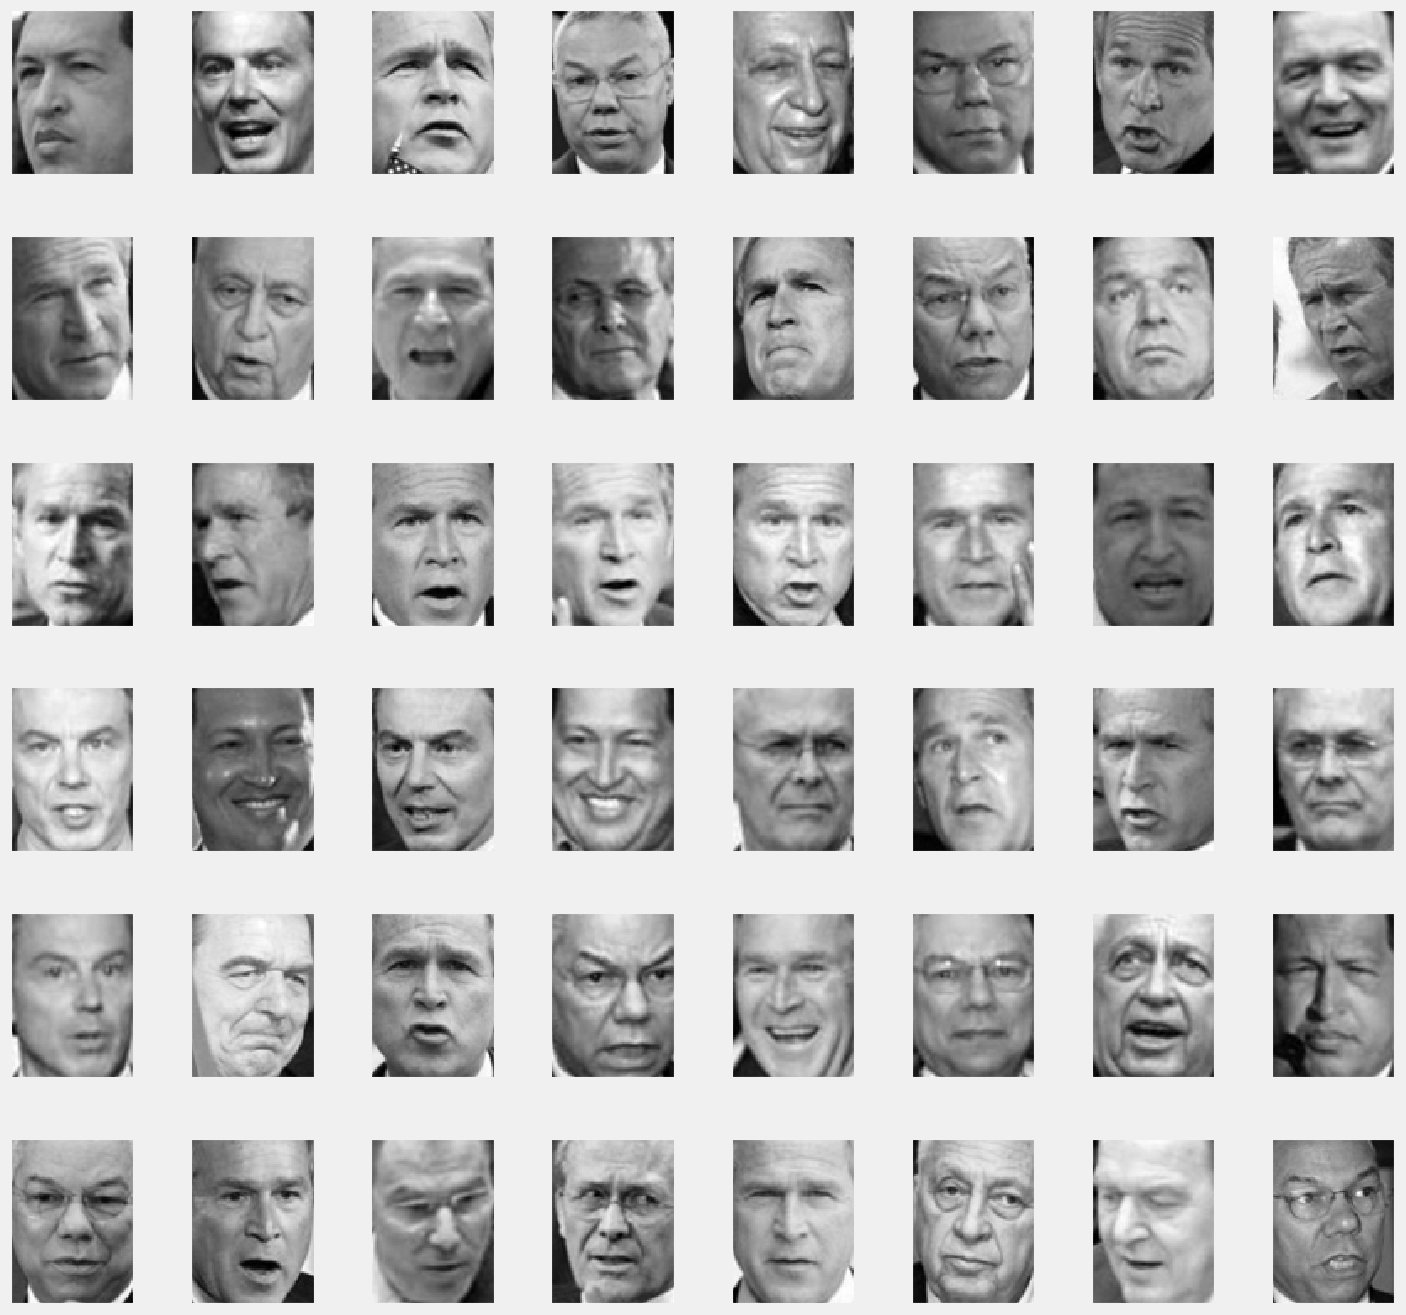

In [13]:
plot_gallery(X, h, w, n_row=6, n_col=8)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)

X_train: (966, 7500)
X_test: (322, 7500)


In totale ci sono 1288 immagini, 100px altezza e 75px di larghezza. 

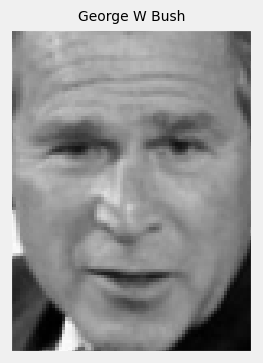

In [15]:
i = 600
plt.figure(figsize=(4,4))
plt.imshow(X_train[i, :].reshape((h, w)), interpolation='nearest', cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.title(target_names[y[i]])
plt.show()

Ognuno degli autovettori nella fase originaria è un vettore. L'immagine è rappresentata come somma pesata di ogni autovettore, che è un vettore sullo spazio originario; quindi, si esprime una singola immagine come somma sovrapposizione pesata di un insieme di immagini. Se si usa pca, la nuova immagine sarà una sovrapposizione di una piccola parte di autovettori.

Calcola PCA sul training set

In [16]:
n_components = 150

In [17]:
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

In [18]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [19]:
eigenfaces.shape

(150, 100, 75)

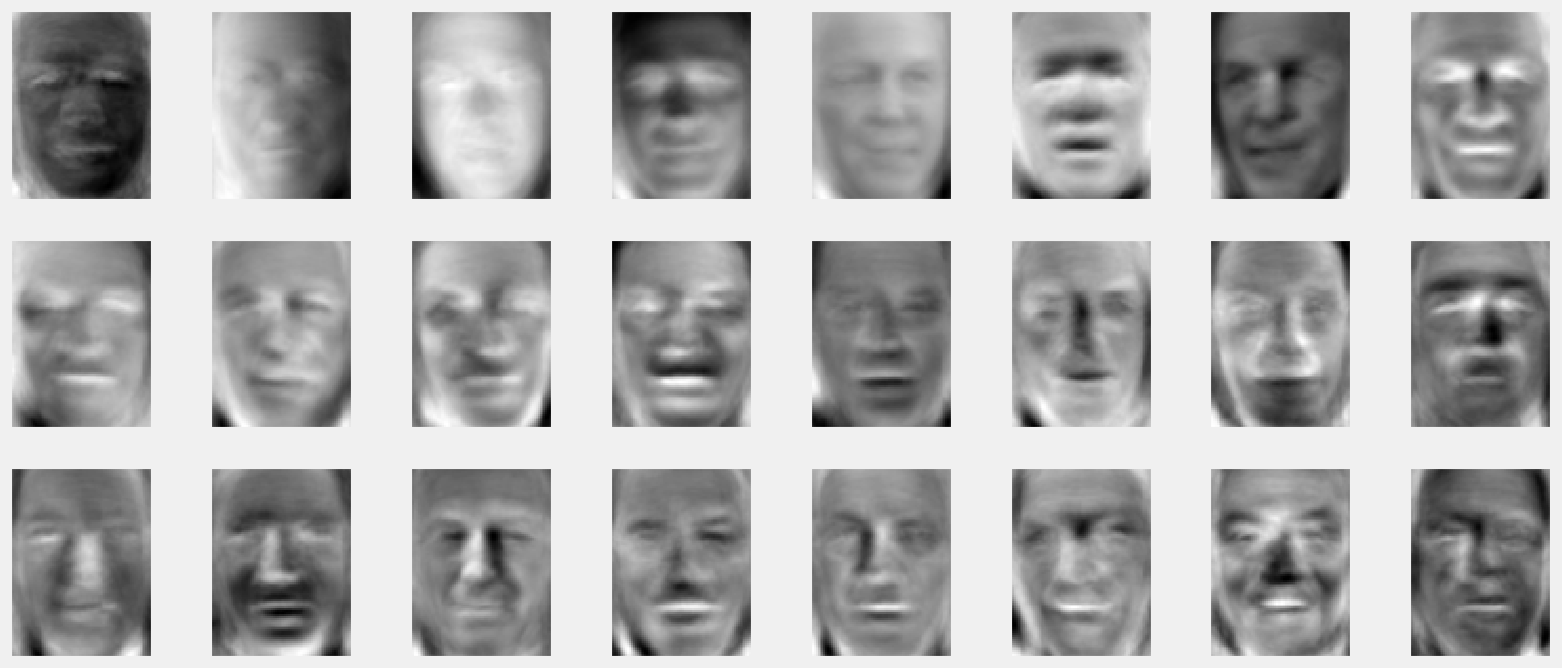

In [20]:
fig, axes = plt.subplots(3, 8, figsize=(18, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(100, 75), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

Ogni immagine coglie alcuni aspetti del viso, e ognuno di questi viene vista come sovrapposizione degli autovettori su uno spazio. 

La migliore è quella dove ogni singolo componente sta sull'autovettore.

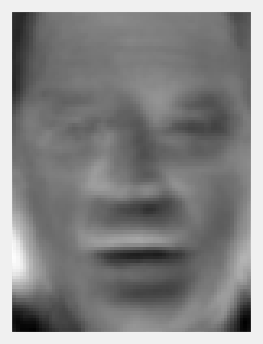

In [21]:
j = 12
plt.figure(figsize=(4,4))
plt.imshow(eigenfaces[j], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

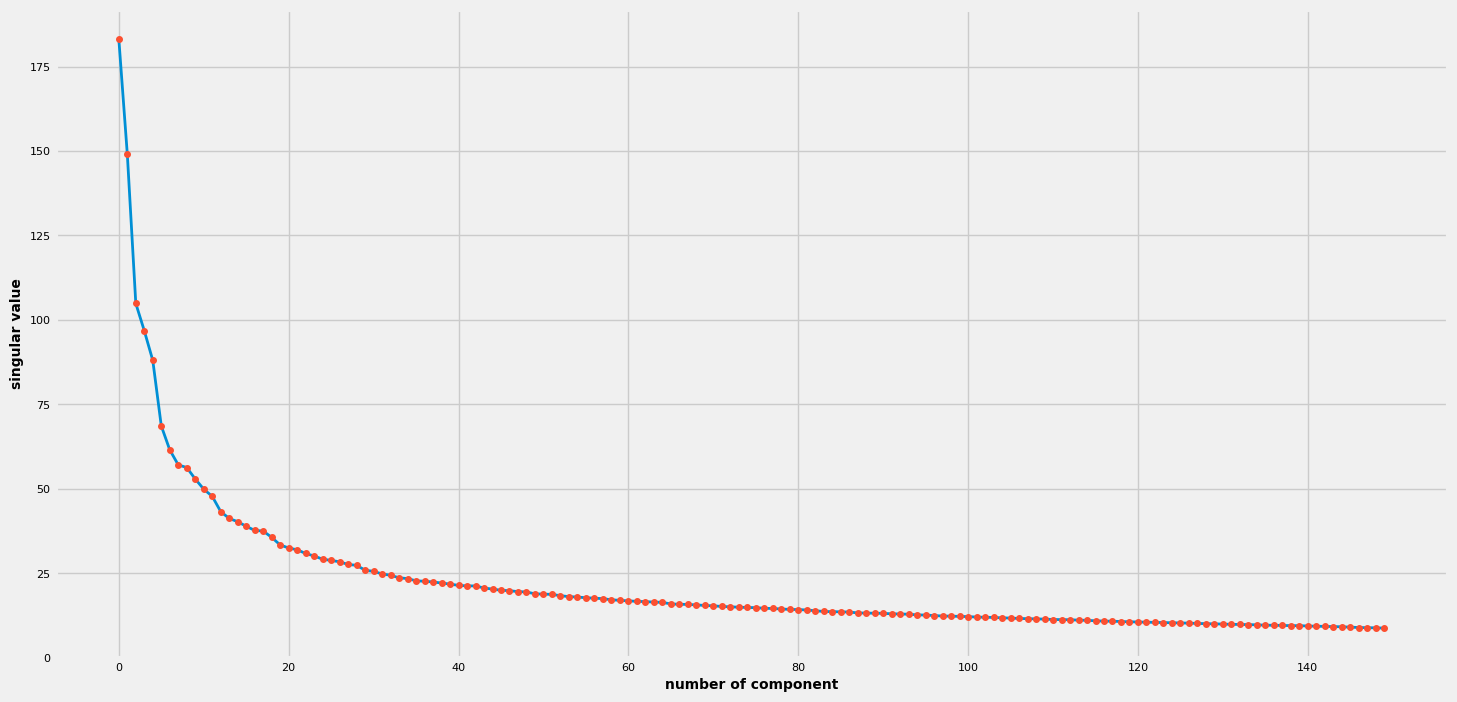

In [22]:
plt.figure(figsize=(16,8))
plt.plot(pca.singular_values_, marker='o', markersize=4, markerfacecolor=colors[1], markeredgecolor=colors[1])
plt.xlabel('number of component')
plt.ylabel('singular value')
plt.show()

Andamento degli autovalori, cioè l'andamento dell'informazione.

Se ci fermiamo a 40 componenti, probabilmente avremo delle immagini in cui il viso è riconoscibile.

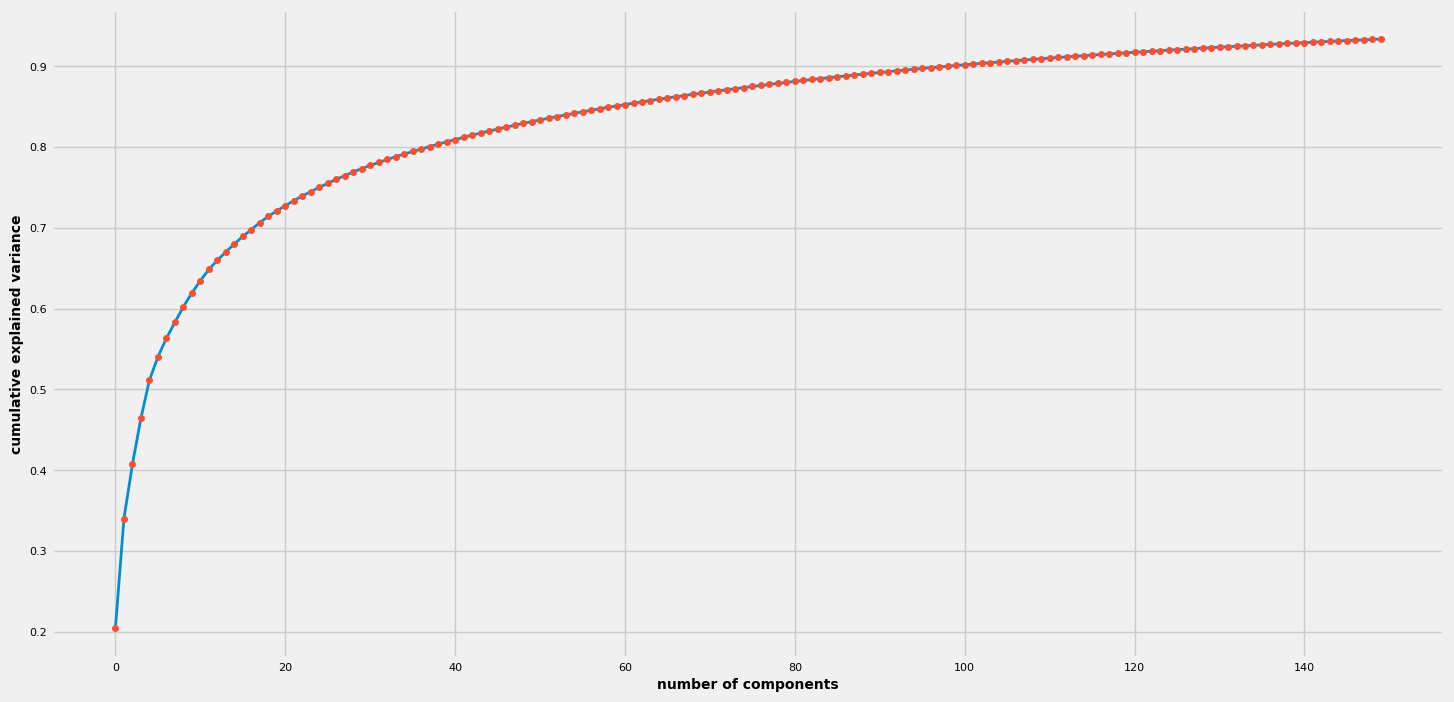

In [23]:
plt.figure(figsize=(16,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', markersize=4, markerfacecolor=colors[1], markeredgecolor=colors[1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [24]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [25]:
X_train_rec = pca.inverse_transform(X_train_pca)

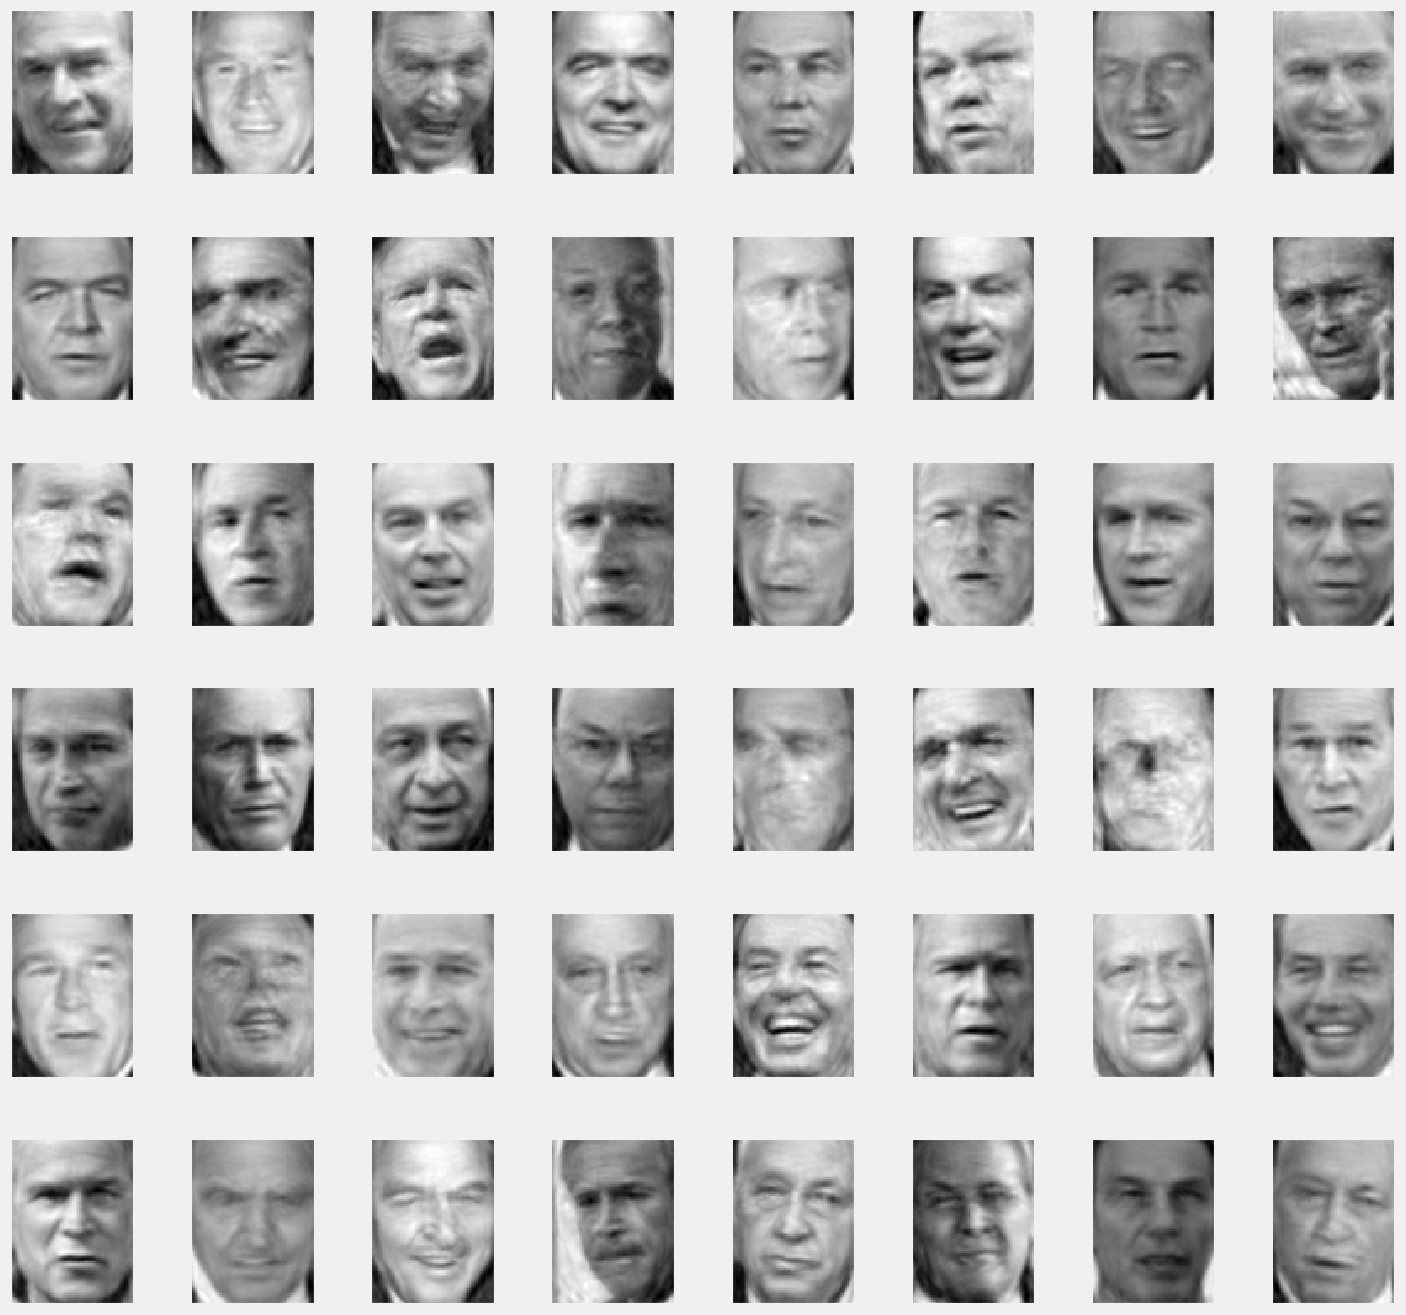

In [26]:
plot_gallery(X_train_rec, h, w, n_row=6, n_col=8)

Non si vedono bene rispetto all'originale; potremmo cambiare la soglia per vedere come si comporta.

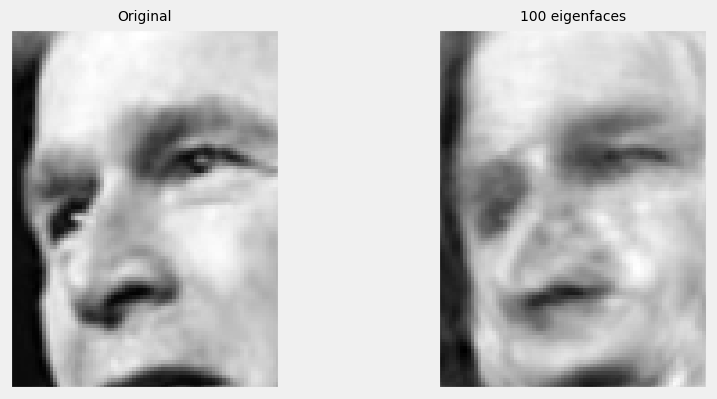

In [27]:
k = 380
ncomponents = 100
pca1 = PCA(n_components=ncomponents, svd_solver='randomized', whiten=True).fit(X_train)
f = pca1.transform(X_train[k,:].reshape(1,-1))
f1 = pca1.inverse_transform(f)

plt.figure(figsize=(8,4))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(X_train[k, :].reshape((h, w)), interpolation='nearest', cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.subplot(1, 2, 2)
plt.title('{0:d} eigenfaces'.format(ncomponents))
plt.imshow(f1.reshape(h,w), interpolation='nearest', cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [28]:
param_grid = {'C': [77, 77.5, 78],
              'gamma': [0.0017, 0.0018, 0.0019] }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=7, scoring='accuracy')
clf = clf.fit(X_train_pca, y_train)

In [29]:
best_params = clf.best_params_
best_score = clf.best_score_
print('C = {0:5.3f}, gamma = {1:7.5f}, accuracy = {2:5.3f}'.format(best_params['C'], best_params['gamma'], best_score))

C = 77.000, gamma = 0.00170, accuracy = 0.813


In [30]:
y_pred_train = clf.predict(X_train_pca)

print(target_names)
print(confusion_matrix(y_train, y_pred_train, labels=range(n_classes)))
print('accuracy: {0:5.3f}'.format(accuracy_score(y_train, y_pred_train, normalize=True)))

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
[[ 64   0   0   0   0   0   0]
 [  0 175   0   0   0   0   0]
 [  0   0  94   0   0   0   0]
 [  0   0   0 391   0   0   0]
 [  0   0   0   0  82   0   0]
 [  0   0   0   0   0  55   0]
 [  0   0   0   0   0   0 105]]
accuracy: 1.000


In [31]:
y_pred_test = clf.predict(X_test_pca)

print(target_names)
print(confusion_matrix(y_test, y_pred_test, labels=range(n_classes)))
print('accuracy: {0:5.3f}'.format(accuracy_score(y_test, y_pred_test, normalize=True)))

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
[[ 10   3   0   0   0   0   0]
 [  0  54   1   4   0   0   2]
 [  4   1  20   1   1   0   0]
 [  1  12   4 119   1   0   2]
 [  0   0   2   2  22   0   1]
 [  0   0   0   1   2  13   0]
 [  1   0   1   6   0   0  31]]
accuracy: 0.835


In [32]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

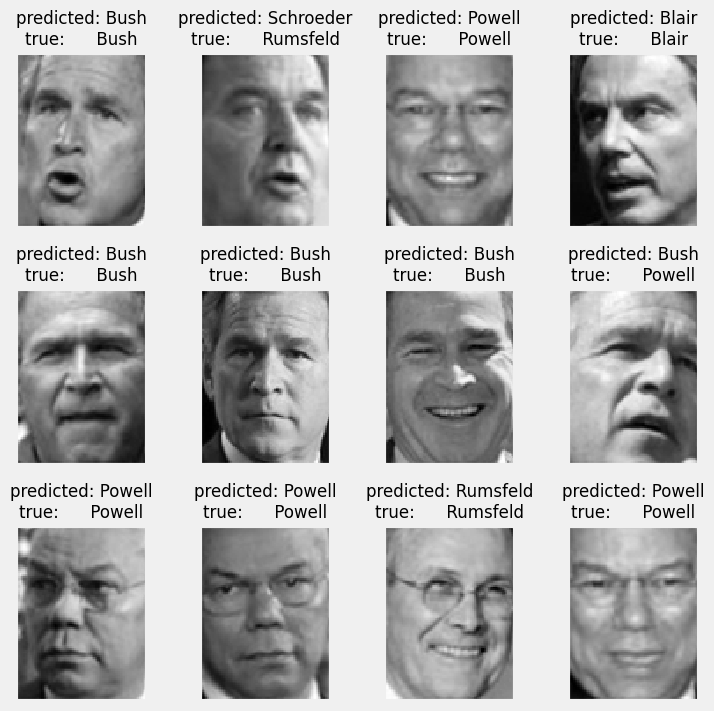

In [33]:
prediction_titles = [title(y_test, y_pred_test, target_names, i) for i in range(y_pred_test.shape[0])]

plot_gallery(X_test, h, w, titles=prediction_titles)

In [34]:
pca2 = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_2 = pca2.transform(X_train) 
X_test_2 = pca2.transform(X_test) 

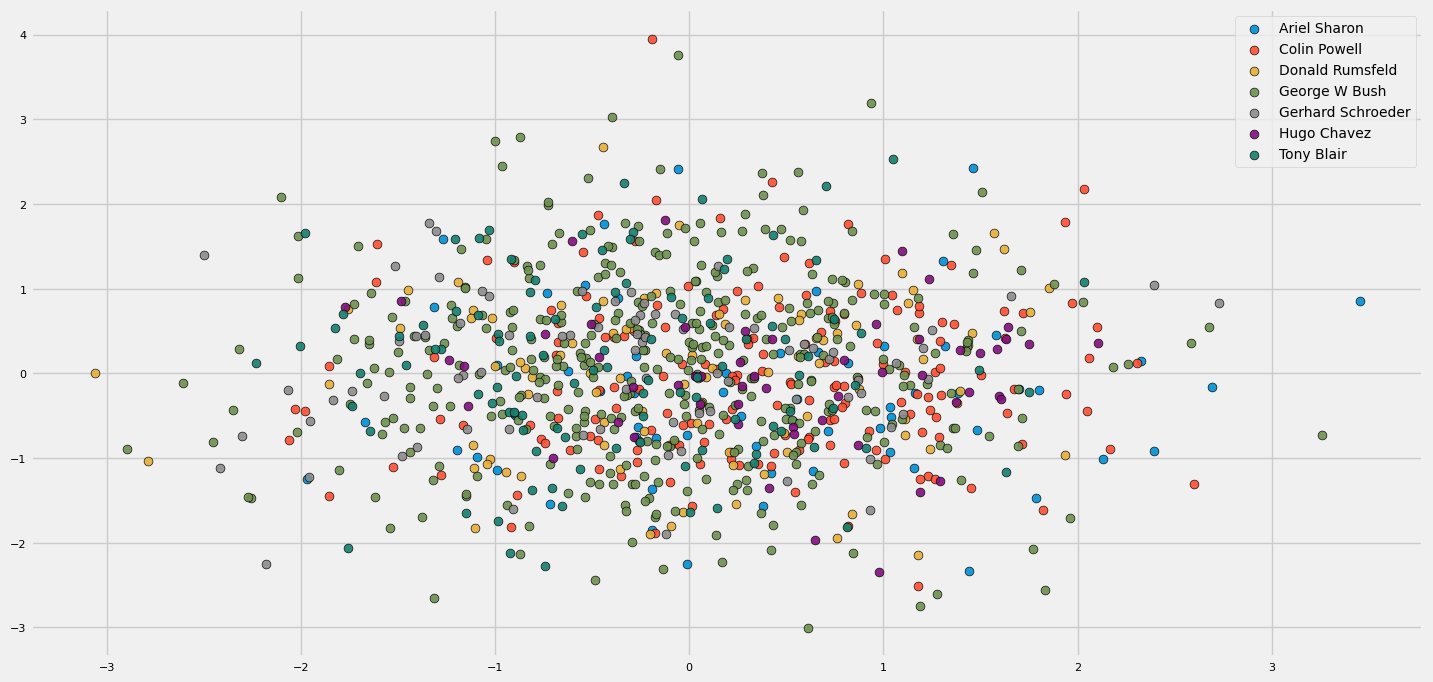

In [35]:
fig = plt.figure(figsize=(16,8))
for i in range(7):
    idx = np.where(y_train == i)
    plt.scatter(X_train_2[idx, 0], X_train_2[idx, 1], c=colors[i], s=40, edgecolors='k', 
                alpha = .9, label='{0:s}'.format(target_names[i]),cmap=cmap)
plt.legend()
plt.show()

In [36]:
param_grid = {'C': [7.5e1, 1e2, 2.5e2],'gamma': [0.0012, 0.00125, 0.0013] }
clf2 = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, scoring='accuracy')
clf2 = clf.fit(X_train_2, y_train)

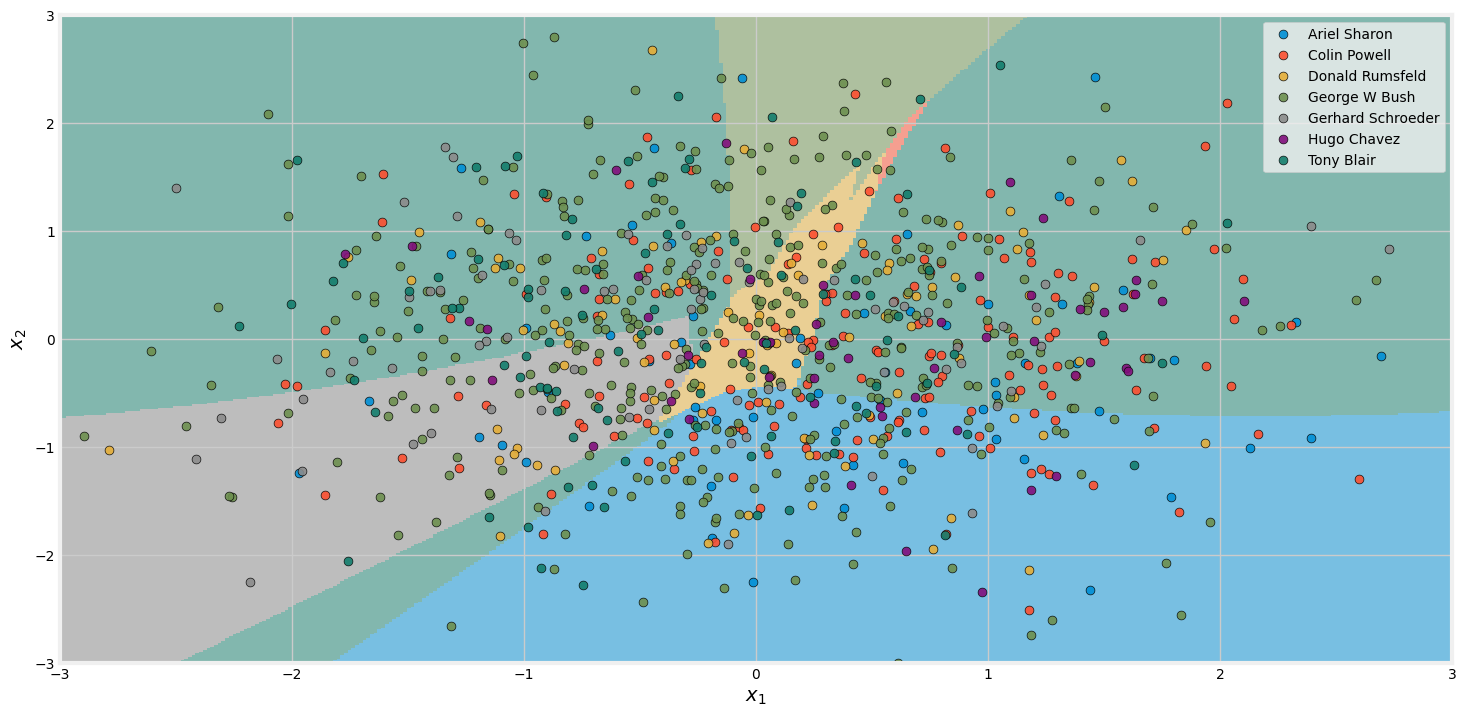

In [37]:
xx, yy = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
pred = np.array([np.argmax(Z[i,:]) for i in range(Z.shape[0])]).reshape(xx.shape)

cmap = mcolors.ListedColormap(colors[0:7])
bounds=[0,1,2,3,4,5,6]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('white')
ax = fig.gca()
imshow_handle = plt.imshow(pred, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', alpha=.5, cmap=cmap, norm=norm)

for i in range(7):
    idx = np.where(y_train == i)
    plt.scatter(X_train_2[idx, 0], X_train_2[idx, 1], c=colors[i], s=40, edgecolors='k', 
                alpha = .9, label='{0:s}'.format(target_names[i]),cmap=cmap)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.show()